# Tech Jobs Salaries in the US

## **Data Sources:**

(1) **Kaggle** : [https://www.kaggle.com/datasets/christopherkverne/100k-us-tech-jobs-winter-2024/data](https://www.kaggle.com/datasets/christopherkverne/100k-us-tech-jobs-winter-2024/data)

(2) **Azuna API**: [https://developer.adzuna.com/activedocs#!/adzuna/search](https://developer.adzuna.com/activedocs#!/adzuna/search)

＃pip install pandas numpy matplotlib seaborn requests openpyxl

#### **DATA Standard:** Yearly/USD/Fulltime


In [ ]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests 
%matplotlib inline 
plt.style.use('seaborn-v0_8-ticks')
sns.set_palette("Set2")   
 


## **Part 1: Data Cleaning**

In [52]:
#Read and Understand first data source from Kaggle
df_kaggle = pd.read_excel('archive/all_jobs.xlsx')
df_kaggle.drop_duplicates(subset=['id'],inplace=True)
#eliminate all intervals that are not "yearly"
df_kaggle = df_kaggle[(df_kaggle['interval']=='yearly') & (df_kaggle['currency']=='USD') & (df_kaggle['job_type'] == 'fulltime')]
cleaned_df_kaggle = df_kaggle[['title', 'location', 'date_posted','min_amount', 'max_amount','description']]
cleaned_df_kaggle['mean_amount'] = (cleaned_df_kaggle['min_amount'] + cleaned_df_kaggle['max_amount']) / 2


/var/folders/vt/dw5r870s2tdgrc9y8ty0klsr0000gn/T/ipykernel_9541/2413852796.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df_kaggle['mean_amount'] = (cleaned_df_kaggle['min_amount'] + cleaned_df_kaggle['max_amount']) / 2


In [53]:
#Read and Understand second data source from Adzuna API
import datetime

days_old = (datetime.datetime.now() - datetime.datetime(2024,12,31)).days

keywords = [
    "Software Engineer",
    "Developer",
    "Cybersecurity",
    "Data Scientist",
    "IT",
    "Engineering",
    "Product Manager",
    "DevOps",
    "AI",
    "Machine Learning"
]

all_results = []

for kw in keywords:
    params = {
        'app_id': 'c03fd4cc',
        'app_key': 'ca3170bb10f83cb030248033420d4698',
        'title_only': kw,
        'max_days_old': days_old,
        'full_time': 1,
        'results_per_page': 50
    }
    response = requests.get("https://api.adzuna.com/v1/api/jobs/us/search/1", params=params)
    data = response.json()
    all_results.extend(data.get("results", []))
adzuna_df = pd.DataFrame(all_results)
adzuna_df.drop_duplicates(subset=['id'],inplace=True)
adzuna_df = adzuna_df[adzuna_df['contract_time'] == 'full_time']
cleaned_adzuna_df = adzuna_df[['title', 'salary_min', 'salary_max', 'location', 'created','description']]

## **Part 2: Merge two dataset**

In [54]:
cleaned_adzuna_df= cleaned_adzuna_df.rename(columns={'salary_min' : 'min_amount', 'salary_max': 'max_amount', 'created': 'date_posted'})
combined_df = pd.concat([cleaned_df_kaggle, cleaned_adzuna_df], ignore_index=True)
combined_df.head()

,title,location,date_posted,min_amount,max_amount,description,mean_amount
0,Cybersecurity Operations Senior Consultant,"Remote, US",2024-10-10 00:00:00,105000.0,135000.0,RISCPoint is seeking a conceptual thinker with...,120000.0
1,Senior Information Security Engineer (GRC),"New York, NY, US",2024-10-10 00:00:00,150000.0,200000.0,Company Description\n\n\nMarketAxess is on a j...,175000.0
2,Information System Security Officer II,"Colorado Springs, CO, US",2024-10-10 00:00:00,84617.0,107144.0,"Global Resource Solutions, Inc. (GRS) is seeki...",95880.5
3,"Identity & Access Management, Analyst","Tampa, FL, US",2024-10-10 00:00:00,83000.0,109000.0,**Do you want your voice heard and your action...,96000.0
4,Cyber Security Government Consultant,"Grand Rapids, MI, US",2024-10-10 00:00:00,68430.0,82410.0,**Job Summary** \nWe are seeking a skilled an...,75420.0


## **Part3 :Analysis**

### Some thoughts: 

(1) Does working remotely affect salary?

(2) Do company revenuses increase with salaries?

(3) Do salaries differ from locations? 

(4) What are the most lucrative programing languages?

## -----------------------------------------------------------------------------------------------

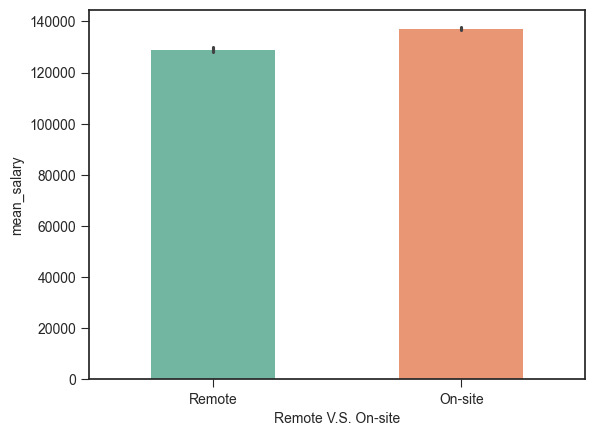

In [55]:
# map numeric remote flag to human-readable labels and add as a new column
df_kaggle['remote_label'] = df_kaggle['is_remote'].map({0: 'On-site', 1: 'Remote'})

# create a barplot comparing average (mean) salary for remote vs on-site roles
ax = sns.barplot(data=df_kaggle, x='remote_label', y='mean_salary', width=0.5, hue='remote_label')

# remove legend since hue duplicates the x-axis categories and clutters the plot
plt.legend().remove()

# label the x-axis to make the chart self-explanatory
ax.set_xlabel('Remote V.S. On-site')

# render the plot to the output cell
plt.show()

## -----------------------------------------------------------------------------------------------

/var/folders/vt/dw5r870s2tdgrc9y8ty0klsr0000gn/T/ipykernel_9541/275074561.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kaggle2['company_revenue'] = pd.Categorical(


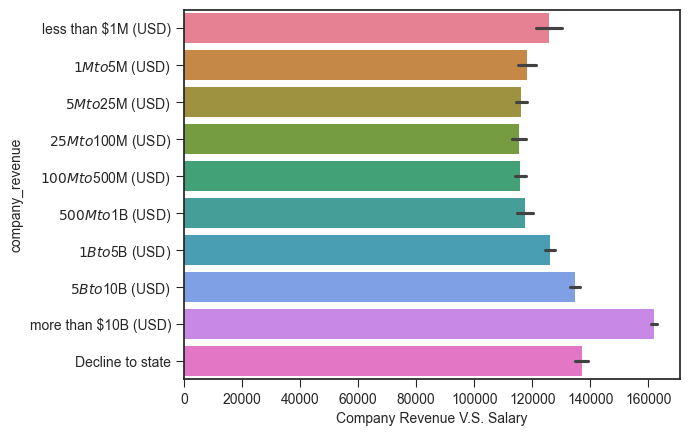

In [50]:
# drop rows with missing company revenue to prepare for grouped plotting
df_kaggle2 = df_kaggle.dropna(subset=['company_revenue'])

# define a custom ordered category for company revenue to control plot ordering
revenue_order = [
    'less than $1M (USD)',
    '$1M to $5M (USD)',
    '$5M to $25M (USD)',
    '$25M to $100M (USD)',
    '$100M to $500M (USD)',
    '$500M to $1B (USD)',
    '$1B to $5B (USD)',
    '$5B to $10B (USD)',
    'more than $10B (USD)',
    'Decline to state'
]

# convert the company_revenue column into an ordered categorical type for meaningful plotting
df_kaggle2['company_revenue'] = pd.Categorical(
    df_kaggle2['company_revenue'],
    categories=revenue_order,
    ordered=True
)

# create a horizontal barplot of mean salary by company revenue category
ax2 = sns.barplot(
    data=df_kaggle2,
    x='mean_salary',
    y='company_revenue',
    hue='company_revenue',  # use hue to color bars by the same category (optional)
)

# label the x-axis to indicate the relationship being shown
ax2.set_xlabel('Company Revenue V.S. Salary')

# display the plot
plt.show()

### Find a small startup or big tech!!

## -----------------------------------------------------------------------------------------------

/var/folders/vt/dw5r870s2tdgrc9y8ty0klsr0000gn/T/ipykernel_9541/3626139979.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area['location'] = cleaned_df_kaggle['location'].str.split(',')
/var/folders/vt/dw5r870s2tdgrc9y8ty0klsr0000gn/T/ipykernel_9541/3626139979.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  area['state'] = area['location'].apply(lambda x: x[1] if len(x) > 1 else None)


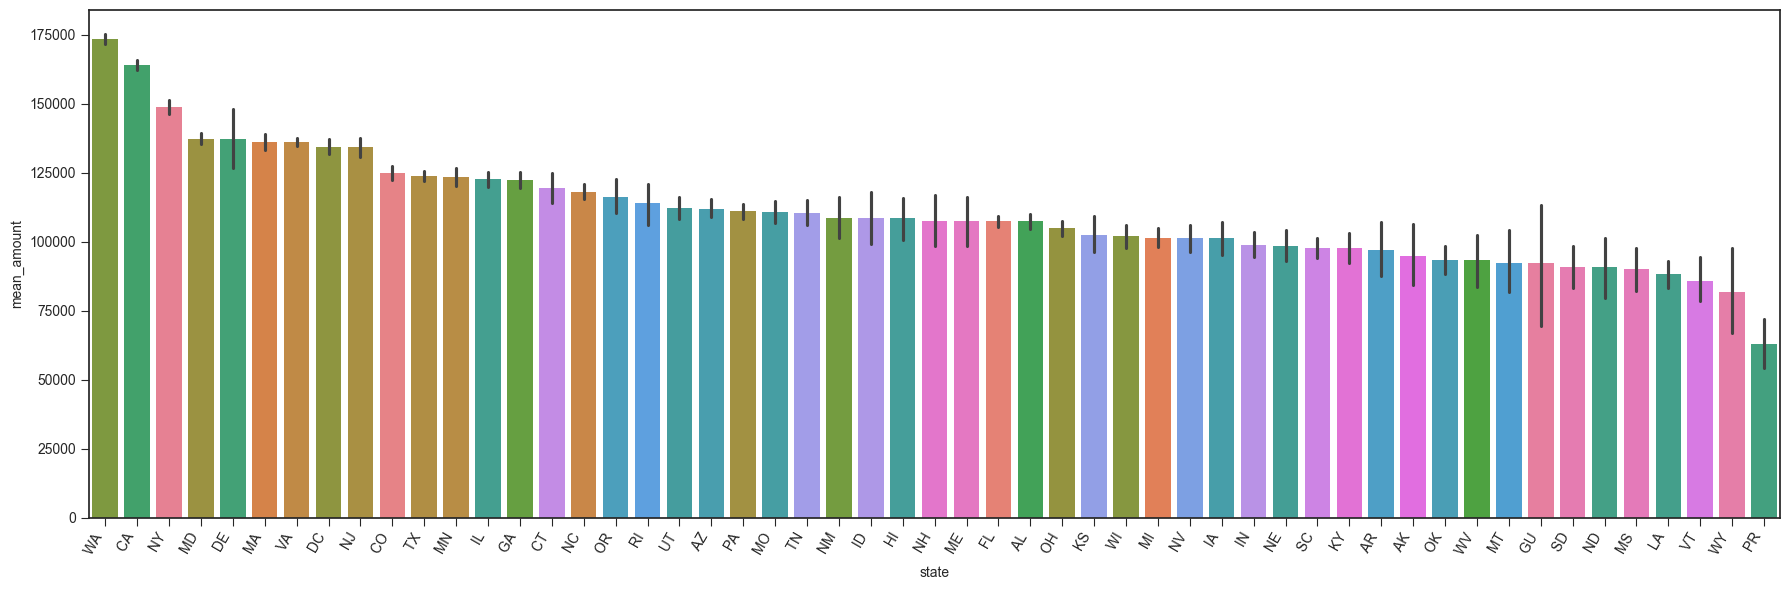

In [56]:
area = cleaned_df_kaggle
# Make a working copy of the cleaned Kaggle dataset

area['location'] = cleaned_df_kaggle['location'].str.split(',')
# Split the 'location' string into a list (e.g., "New York, NY" → ["New York", " NY"])

area['state'] = area['location'].apply(lambda x: x[1] if len(x) > 1 else None)
# Extract the state code (the second element in the list). If there's no second value, return None.

area = area[(area['state']!= ' VI' ) & (area['state']!= ' US')]
# Remove records from Virgin Islands (VI) and entries labeled as 'US' (ambiguous / not a specific state)

order = area.groupby('state')['mean_amount'].mean().sort_values(ascending=False).index
# Compute the average salary per state and sort states from highest to lowest salary.
# Extract the state order for plotting.

plt.figure(figsize=(18,6))
# Set the figure size for the bar chart

sns.barplot(
    data=area,
    x='state',
    y='mean_amount',
    hue='state',
    order=order
)
# Draw a barplot: x-axis = state, y-axis = average salary, colored by state, following the sorted order.

plt.legend().remove()
# Remove the legend since it's redundant (each state is already labeled on the x-axis)

plt.xticks(rotation=60, ha='right')
# Rotate x-axis labels by 60 degrees for readability, align them to the right

plt.tight_layout()
# Automatically adjust padding to prevent label overlap

plt.show()
# Display the final plot


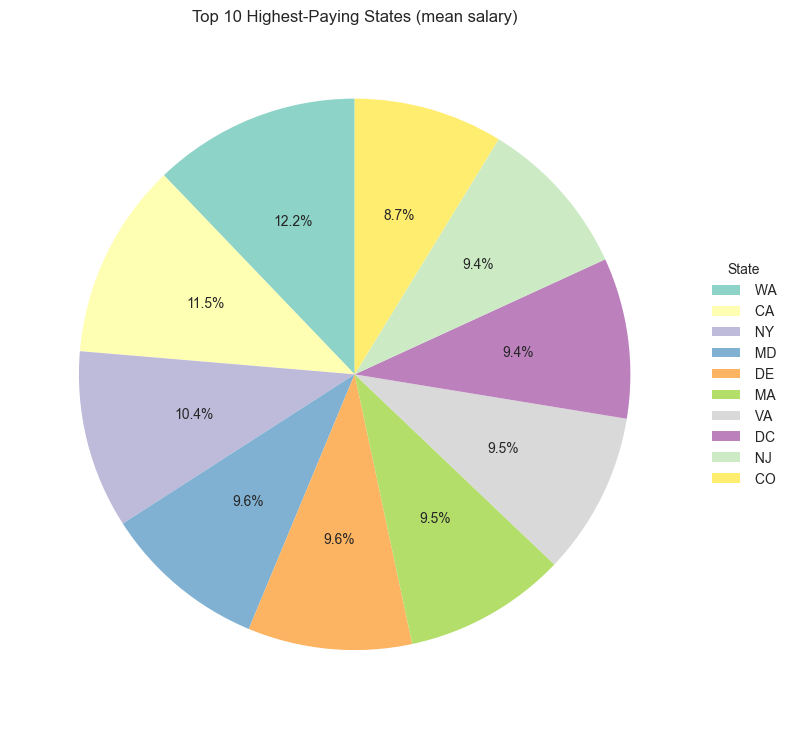

In [57]:
# Compute the top 10 states by mean salary to visualize distribution via pie chart
state_salary = area.groupby('state')['mean_amount'].mean().sort_values(ascending=False).head(10)

# set figure size for the pie chart
plt.figure(figsize=(8,8))

# create a pie chart; capture wedge objects and text for labeling/legend
wedges, texts, autotexts = plt.pie(
    state_salary.values,  # values to plot
    autopct='%1.1f%%',    # show percentage inside each wedge
    startangle=90,        # rotate start for better orientation
    colors=plt.cm.Set3(np.linspace(0, 1, len(state_salary)))  # use a colormap to pick distinct colors
)

# add a legend that maps wedge colors to state names and place it to the right
plt.legend(
    wedges,
    state_salary.index,
    title="State",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
)

# set a descriptive title for the chart
plt.title("Top 10 Highest-Paying States (mean salary)")

# adjust layout to prevent overlap between legend and chart
plt.tight_layout()

# render the pie chart
plt.show()

## 1. Seattle(WA)
 Home to major tech giants such as Amazon and Microsoft, Seattle is a hub for cloud computing, AI, and software engineering roles.
## 2. Silicon Valley(CA)
 The heart of the global tech industry, housing companies like Google, Meta, Apple, and numerous high-growth startups.
## 3. Wall Street(NY)
 The financial center of the United States, known for investment banking, asset management, quantitative finance, and consulting.
## 4. Corporate Haven: Legal & Financial Advantages (MD)
 Delaware is widely recognized as the preferred state for company incorporation due to its business-friendly laws, tax benefits, and strong legal framework.
## 5. Washington D.C.: Government Tech & Defense Technology (DE)
 A major hub for federal agencies, government contractors, cybersecurity, and defense-related engineering and research.

## -----------------------------------------------------------------------------------------------

/var/folders/vt/dw5r870s2tdgrc9y8ty0klsr0000gn/T/ipykernel_9541/2381371136.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.index, y=top10.values, palette='tab10')


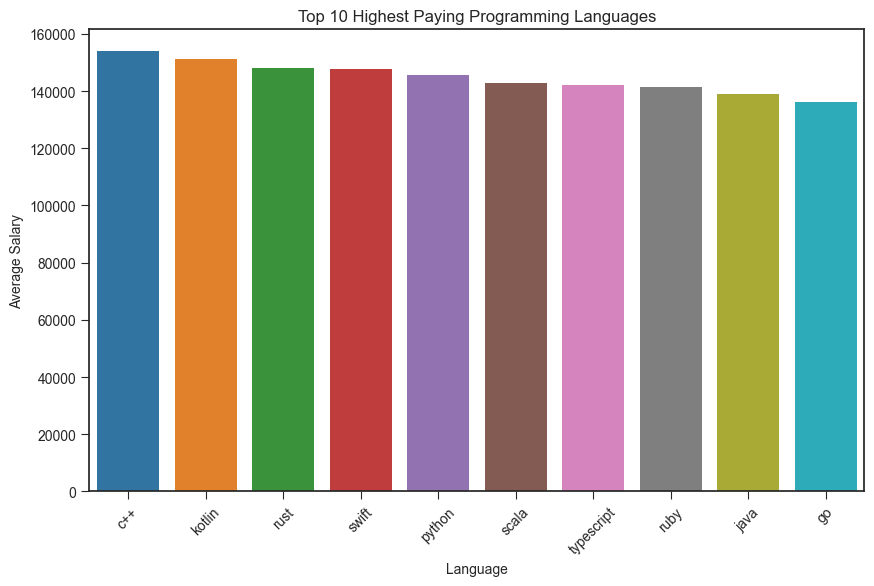

In [58]:
# list of programming languages/keywords to search for in job descriptions
languages = [
    "python", "java", "javascript", "c++", "c#", "go", "rust", "php", "swift",
    "kotlin", "ruby", "typescript", "scala", "r", "matlab", "sql"
]

# create a lowercase copy of descriptions to perform case-insensitive matching
combined_df['description_lower'] = combined_df['description'].str.lower()

# helper function that returns all languages found in a text string
def extract_languages(text):
    return [lang for lang in languages if lang in text]

# apply the extractor to each description and store results in a new column
combined_df['languages'] = combined_df['description_lower'].apply(extract_languages)

# explode the list of languages so each row corresponds to a single language mention
lang_salary = combined_df.explode('languages')

# compute the mean salary for each language and sort descending
lang_income = (
    lang_salary
    .groupby('languages')['mean_amount']
    .mean()
    .sort_values(ascending=False)
)

# select the top 10 highest-paying languages
top10 = lang_income.head(10)

# plot a bar chart showing average salary per language (top 10)
plt.figure(figsize=(10,6))
sns.barplot(x=top10.index, y=top10.values, palette='tab10')

# rotate x labels for readability
plt.xticks(rotation=45)

# add title and axis labels
plt.title("Top 10 Highest Paying Programming Languages")
plt.ylabel("Average Salary")
plt.xlabel("Language")

# show the final plot
plt.show()

### C++ brings you money

## -----------------------------------------------------------------------------------------------

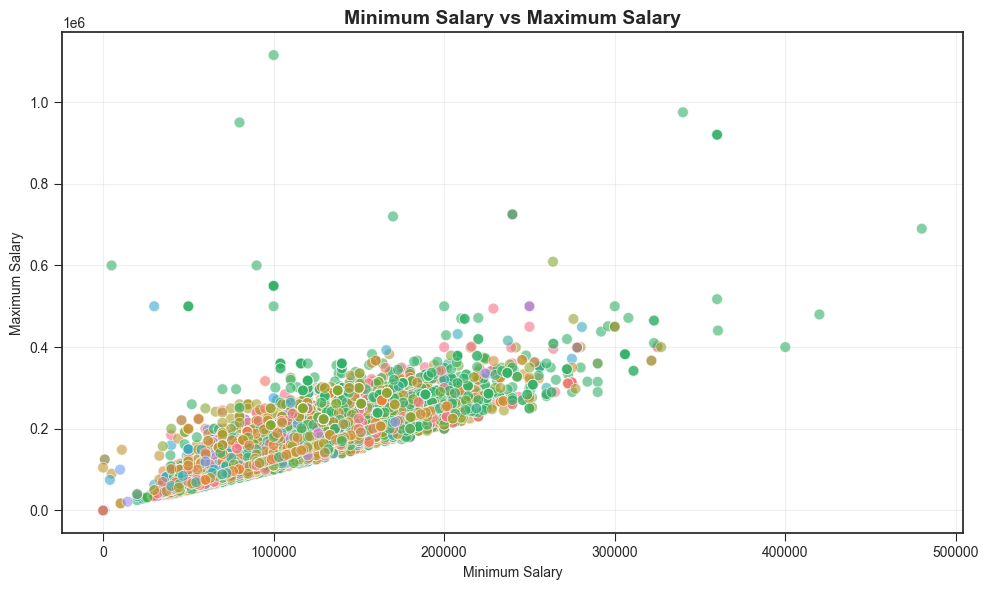

In [59]:
# create a scatterplot figure to compare minimum and maximum salary values
plt.figure(figsize=(10,6))

# scatterplot showing relationship between min and max salary, colored by state
sns.scatterplot(
    data=area,             # DataFrame containing salary and state columns
    x="min_amount",      # plot minimum salary on the x-axis
    y="max_amount",      # plot maximum salary on the y-axis
    alpha=0.6,             # make points semi-transparent to reveal density
    s=60,                  # set marker size
    hue='state',           # color points by state
)

# set a clear, descriptive title with font styling
plt.title("Minimum Salary vs Maximum Salary", fontsize=14, fontweight="bold")

# label axes so viewers know what is plotted
plt.xlabel("Minimum Salary")
plt.ylabel("Maximum Salary")

# add light grid lines to help read values
plt.grid(True, alpha=0.3)

# remove legend to reduce clutter when there are many states
plt.legend().remove()

# tighten layout to avoid clipping
plt.tight_layout()

# display the scatterplot
plt.show()

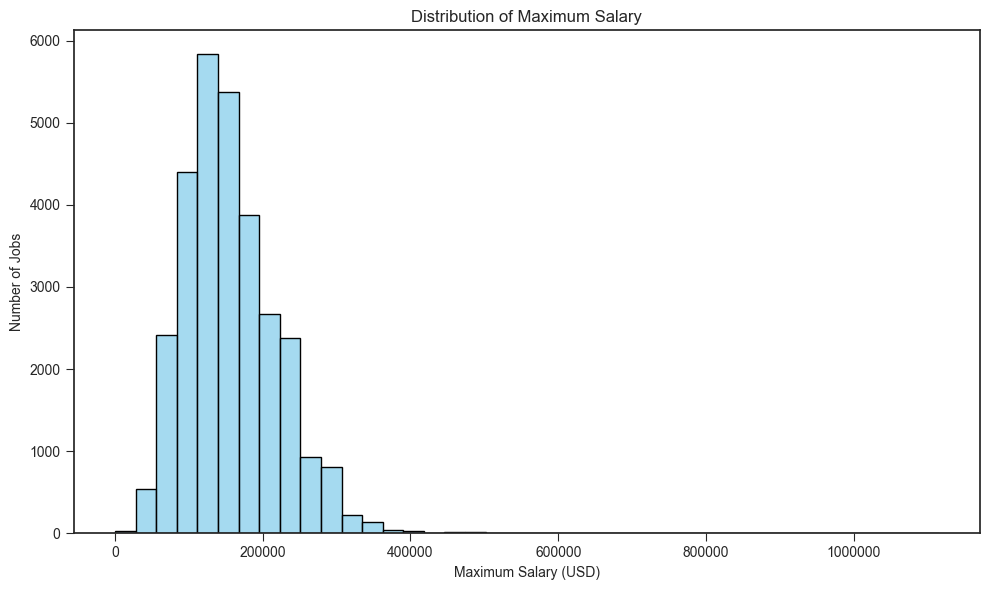

In [60]:
plt.figure(figsize=(10,6))  # create a new figure with width=10in and height=6in
sns.histplot(  # draw a histogram using seaborn
    data=area,  # use the 'area' DataFrame as the data source
    x="max_amount",  # plot the 'max_amount' column on the x-axis
    bins=40,  # divide the data into 40 bins
    stat="count",   # show counts per bin (frequency) rather than density
    color="skyblue"  # set the histogram color to sky blue
)
plt.ticklabel_format(style='plain', axis='x')  # use plain (non-scientific) formatting for x-axis tick labels

plt.title("Distribution of Maximum Salary")  # set the plot title
plt.xlabel("Maximum Salary (USD)")  # label the x-axis
plt.ylabel("Number of Jobs")  # label the y-axis
plt.tight_layout()  # adjust layout to prevent clipping of labels/titles
plt.show()  # display the figure

## Due to extreme salary values, the distribution plot is heavily skewed.

## -----------------------------------------------------------------------------------------------